# Classification
**Classification example with PyTorch**

---

In [1]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal" -p numpy,matplotlib,torch -u -n -t -z -m

Vutsal Singhal 
last updated: Sun Jan 21 2018 17:57:49 EST

numpy 1.13.3
matplotlib 2.1.0
torch 0.3.0.post4

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.13.0-26-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(20)

## Generating some data

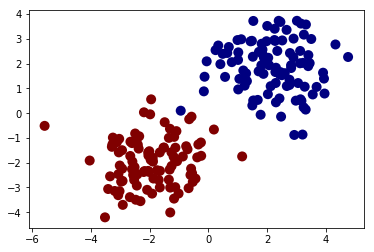

In [18]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100) 
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='jet')
plt.show()

In [19]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [20]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10)
  (out): Linear(in_features=10, out_features=2)
)


In [21]:
plt.ion()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


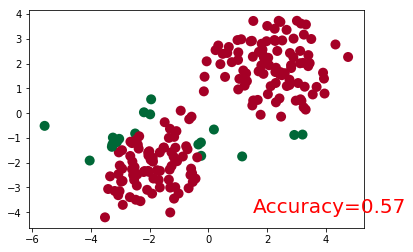

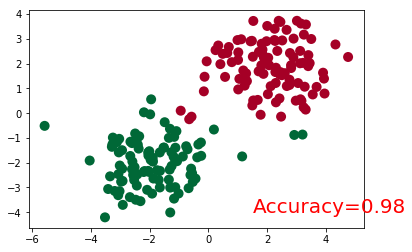

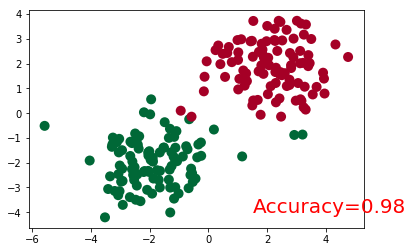

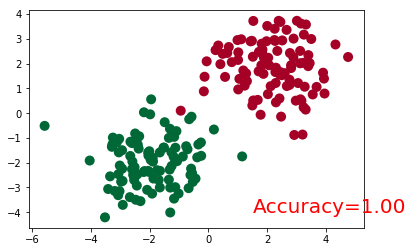

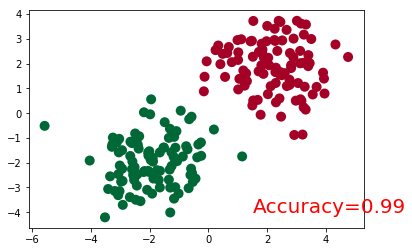

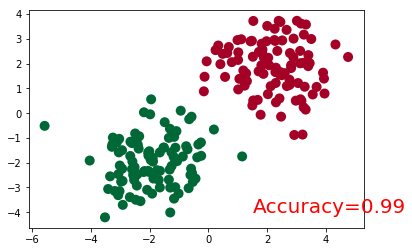

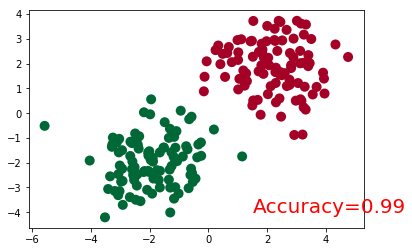

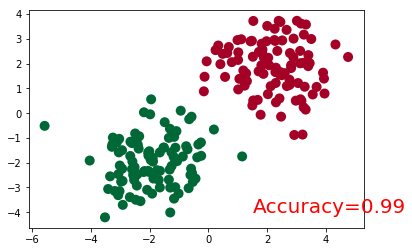

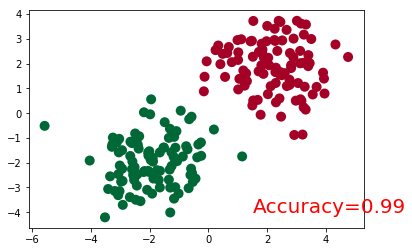

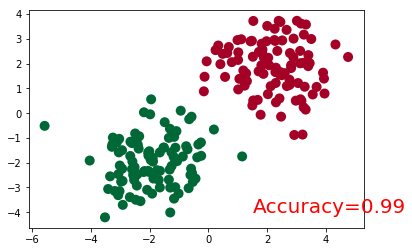

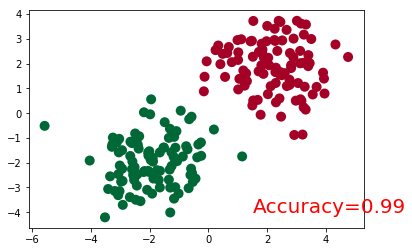

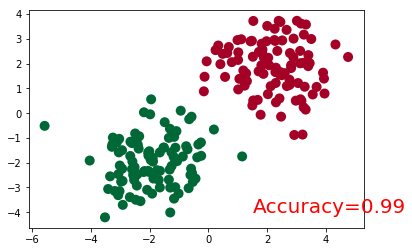

In [22]:
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0 or t in [3, 6]:
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
plt.ioff()